In [41]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with

connection = mysql.connector.connect(
user='root',
password='Shivam@2003',
host='localhost',
database='ecommerce'
)

In [42]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [43]:
#printing records from each table
print(customer_data)
print(product_data)
print(order_data)


  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     John            Sydney         john@gmail.com  9978234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                    k.road     75001  
2             2F ikenobecho       171  
3           24-2. Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  
  product_id product_name     category sub_category original_price  \
0       P102        Chair    furniture       Chairs       20000.00   
1       P103       Laptop  Electronics     computer       60000.00   
2       P104   Smartphone  Electronics        phone       45000.00   
3    

<center>Data Cleaning</center>

1. Checking for missing values

In [44]:
print("Missing values in Customer Table:\n", customer_data.isnull().sum())
print("\nMissing values in Product Table:\n", product_data.isnull().sum())
print("\nMissing values in Order Details Table:\n", order_data.isnull().sum())

Missing values in Customer Table:
 customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

Missing values in Product Table:
 product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

Missing values in Order Details Table:
 order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64


2. Ensuring data types are appropriate for each column

In [45]:
print("\nData Types in Customer Table:\n", customer_data.dtypes)
print("\nData Types in Product Table:\n", product_data.dtypes)
print("\nData Types in Order Details Table:\n", order_data.dtypes)


Data Types in Customer Table:
 customer_id    object
name           object
city           object
email          object
phone_no       object
address        object
pin_code        int64
dtype: object

Data Types in Product Table:
 product_id        object
product_name      object
category          object
sub_category      object
original_price    object
selling_price     object
stock              int64
dtype: object

Data Types in Order Details Table:
 order_id                 int64
customer_id             object
product_id              object
quantity               float64
total_price            float64
payment_mode            object
order_date      datetime64[ns]
order_status            object
dtype: object


3. Handling outliers and inconsistencies

In [46]:
#Checking for outliers in numerical columns using descriptive statistics
print("\nSummary Statistics for Product Table:\n", product_data.describe())
print("\nSummary Statistics for Order Details Table:\n", order_data.describe())



Summary Statistics for Product Table:
            stock
count   5.000000
mean   18.000000
std    17.888544
min    10.000000
25%    10.000000
50%    10.000000
75%    10.000000
max    50.000000

Summary Statistics for Order Details Table:
        order_id  quantity   total_price           order_date
count  5.000000       5.0      5.000000                    5
mean   5.400000       1.0  21200.000000  2023-12-06 04:48:00
min    3.000000       1.0   1000.000000  2023-11-30 00:00:00
25%    4.000000       1.0  15000.000000  2023-11-30 00:00:00
50%    5.000000       1.0  15000.000000  2023-12-01 00:00:00
75%    7.000000       1.0  20000.000000  2023-12-15 00:00:00
max    8.000000       1.0  55000.000000  2023-12-15 00:00:00
std    2.073644       0.0  20179.197209                  NaN


In [47]:
# Detecting and handling outliers (e.g., in 'quantity' or 'total_price' columns)
# Filtering rows where 'quantity' is unusually high or negative
order_data = order_data[(order_data['quantity'] > 0) & (order_data['quantity'] < 100)]

In [48]:
# Checking for inconsistencies (e.g., mismatched IDs in foreign keys)
# Ensuring all 'customer_id' in order_data exist in customer_data
valid_customers = customer_data['customer_id'].unique()
order_data = order_data[order_data['customer_id'].isin(valid_customers)]


In [49]:
# Ensuring all 'product_id' in order_data exist in product_data
valid_products = product_data['product_id'].unique()
order_data = order_data[order_data['product_id'].isin(valid_products)]

In [50]:
# Printing cleaned data (first 5 records from each cleaned table)
print("\nCleaned Customer Data:\n", customer_data)
print("\nCleaned Product Data:\n", product_data)
print("\nCleaned Order Data:\n", order_data)



Cleaned Customer Data:
   customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     John            Sydney         john@gmail.com  9978234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                    k.road     75001  
2             2F ikenobecho       171  
3           24-2. Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  

Cleaned Product Data:
   product_id product_name     category sub_category original_price  \
0       P102        Chair    furniture       Chairs       20000.00   
1       P103       Laptop  Electronics     computer       60000.00   
2       P104   Smartphone 

Convert data types if needed

In [51]:
customer_data['pin_code'] = customer_data['pin_code'].astype(str)
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

<center>Exploratory Data Analysis (EDA) and Visualization</center>

1.Customer Analysis:

Total number of customers city wise:
 city
Kanagawa            1
Lake Buena Vista    1
Sydney              1
Tokyo               2
dtype: int64


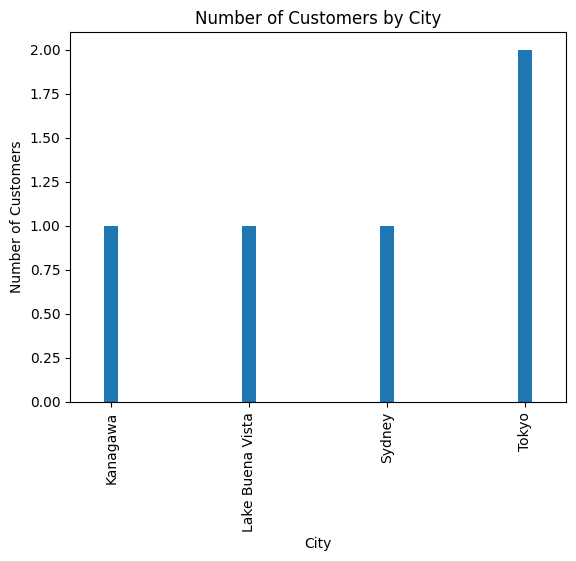

In [62]:
# Identify the total number of customers city wise
city_customer_count = customer_data.groupby('city').size()
print("Total number of customers city wise:\n", city_customer_count)
city_customer_count.plot(kind='bar', title='Number of Customers by City', width=0.1)
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.show()


Most frequent customers:
 customer_id
C1003    2
C1004    1
C1005    1
Name: count, dtype: int64


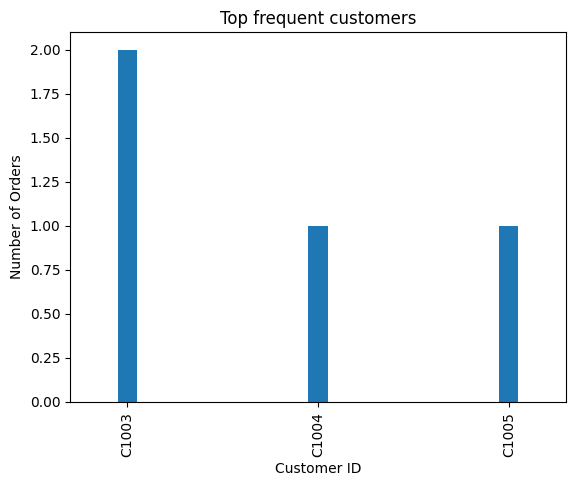

In [61]:
# Identify the most frequent customers based on their order history
frequent_customers = order_data['customer_id'].value_counts().head(10)
print("Most frequent customers:\n", frequent_customers)
frequent_customers.plot(kind='bar', title='Top frequent customers', width=0.1)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()


2. Product Analysis


Total number of products by category:
category
Electronics    3
furniture      1
Appliance      1
Name: count, dtype: int64


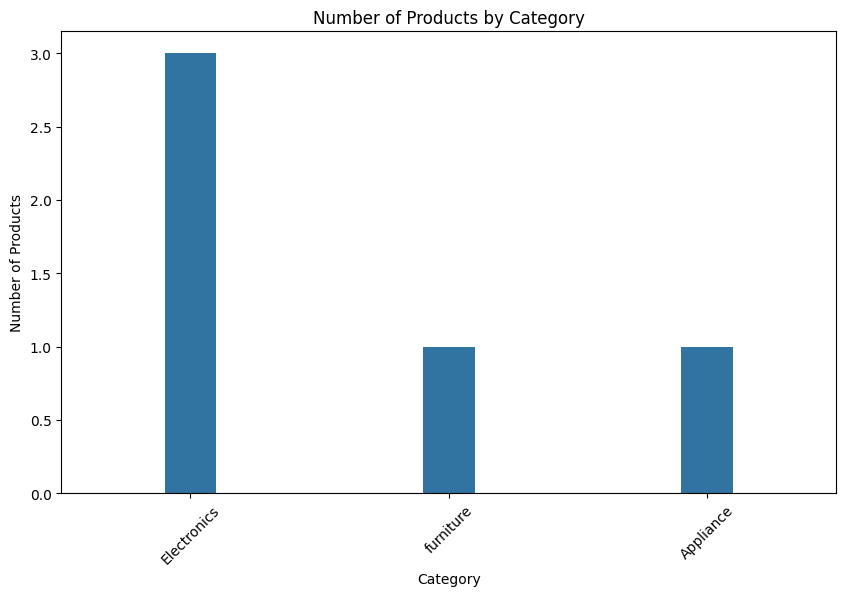

In [60]:
# Total number of products by category
category_count = product_data['category'].value_counts()
print("\nTotal number of products by category:")
print(category_count)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_count.index, y=category_count.values, width=0.2)
plt.title('Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


Distribution of Products Across Sub-Categories:
  sub_category  total_products
0       Chairs               1
1     computer               1
2        phone               1
3  Electronics               1
4    Computers               1


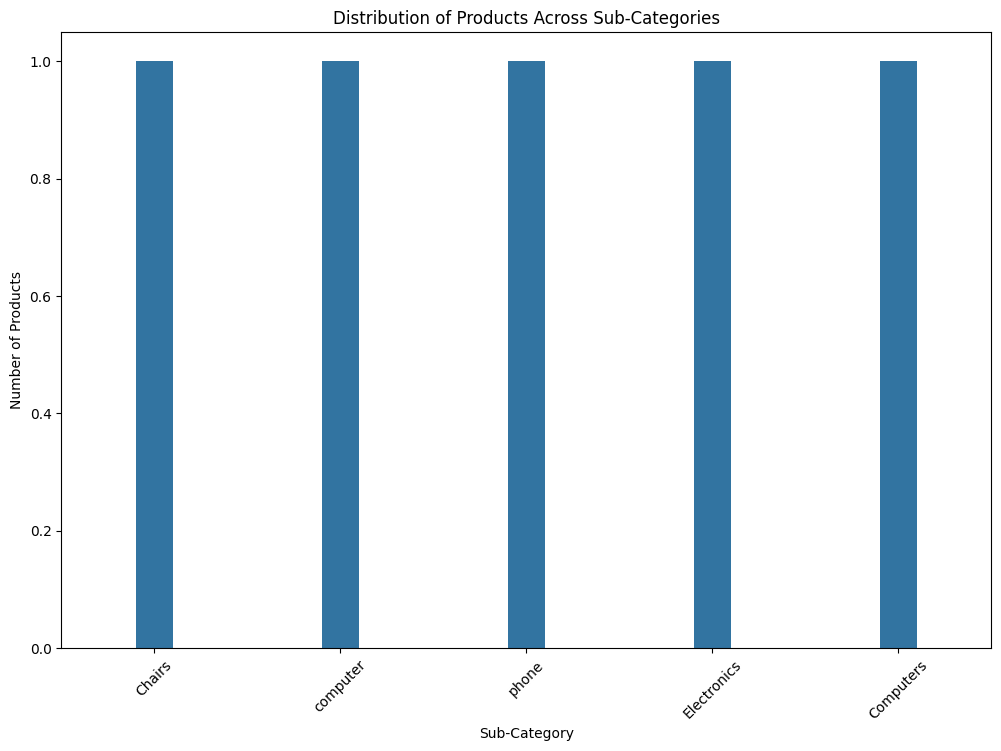

In [69]:
sub_category_counts = product_data['sub_category'].value_counts().reset_index()
sub_category_counts.columns = ['sub_category', 'total_products']
print("\nDistribution of Products Across Sub-Categories:")
print(sub_category_counts)

plt.figure(figsize=(12, 8))
sns.barplot(x='sub_category', y='total_products', data=sub_category_counts, width=0.2)
plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()



Products with low stock levels:
Empty DataFrame
Columns: [product_id, product_name, category, sub_category, original_price, selling_price, stock]
Index: []


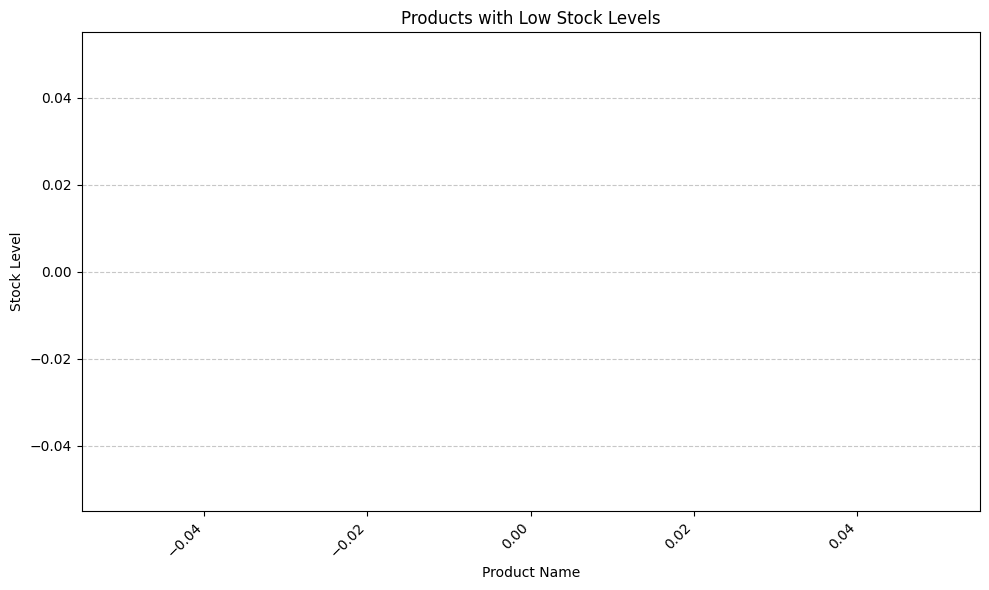

In [73]:
# Products with low stock levels (threshold: 5 units)
low_stock_products = product_data[product_data['stock'] <= 5]
print("\nProducts with low stock levels:")
print(low_stock_products)

plt.figure(figsize=(10, 6))
plt.bar(low_stock_products['product_name'], low_stock_products['stock'], color='salmon')
plt.title('Products with Low Stock Levels')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()



Average Price: 33090.20
Maximum Price: 55000.99
Minimum Price: 450.00


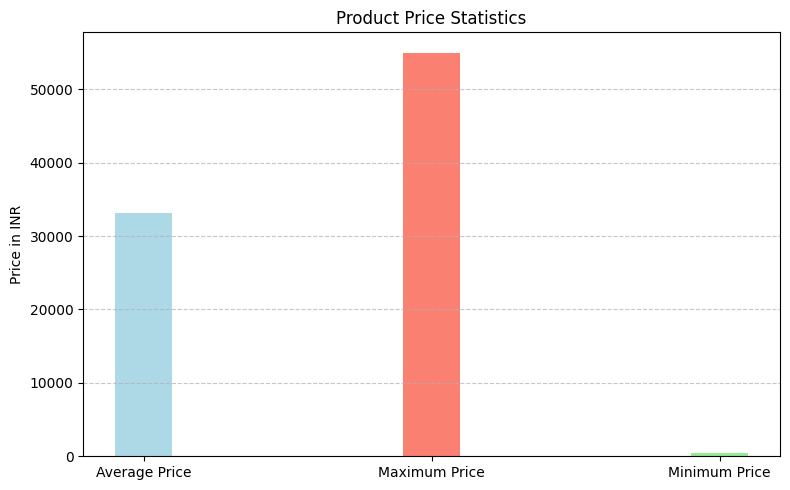

In [75]:
# Calculate average, maximum, and minimum prices
average_price = product_data['selling_price'].mean()
maximum_price = product_data['selling_price'].max()
minimum_price = product_data['selling_price'].min()

# Prepare data for visualization
price_stats = {
    'Average Price': average_price,
    'Maximum Price': maximum_price,
    'Minimum Price': minimum_price
}

# Print calculated prices
print(f"Average Price: {average_price:.2f}")
print(f"Maximum Price: {maximum_price:.2f}")
print(f"Minimum Price: {minimum_price:.2f}")

# Visualization using Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(price_stats.keys(), price_stats.values(), color=['lightblue', 'salmon', 'lightgreen'], width=0.2)
plt.title('Product Price Statistics')
plt.ylabel('Price in INR')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

3. Order Analysis


Top 10 orders product-wise:
  product_id  quantity product_name
0       P103       2.0       Laptop
1       P102       1.0        Chair
2       P106       1.0    Laptop HP


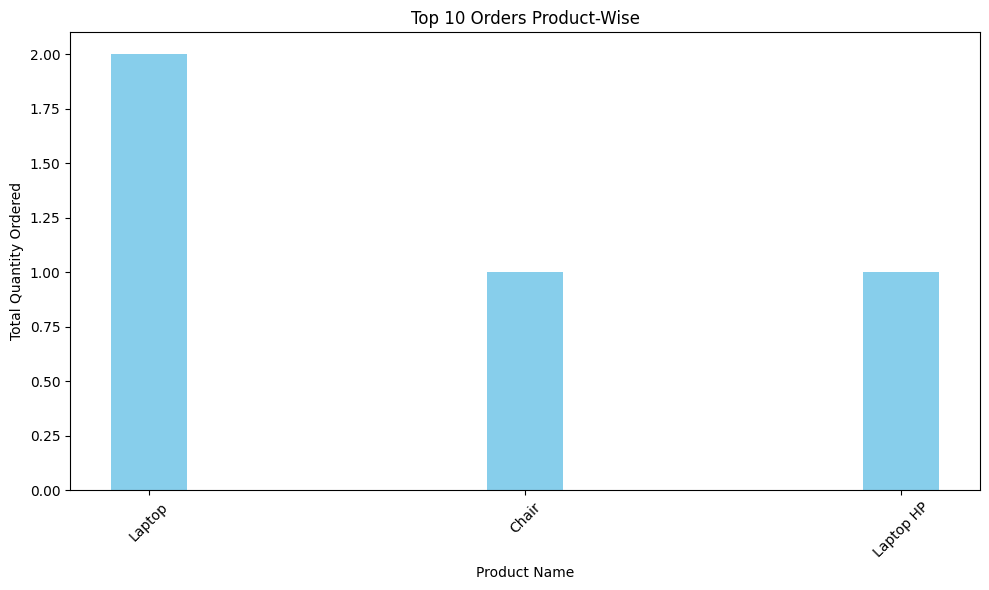

In [78]:
# Top 10 orders product-wise
top_10_orders = order_data.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
top_10_orders_df = pd.merge(top_10_orders.reset_index(), product_data[['product_id', 'product_name']], on='product_id')
print("\nTop 10 orders product-wise:")
print(top_10_orders_df)

# Visualization: Top 10 orders product-wise
plt.figure(figsize=(10, 6))
plt.bar(top_10_orders_df['product_name'], top_10_orders_df['quantity'], color='skyblue', width=0.2)
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.title('Top 10 Orders Product-Wise')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Order status distribution:
order_status
Pending      2
Delivered    2
Name: count, dtype: int64


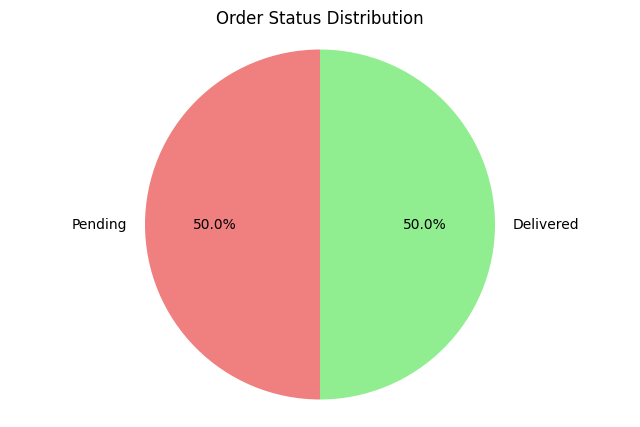

In [79]:
# Order status distribution
order_status_counts = order_data['order_status'].value_counts()
print("\nOrder status distribution:")
print(order_status_counts)

# Visualization: Order status distribution
plt.figure(figsize=(8, 5))
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue'], startangle=90)
plt.title('Order Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


Most popular products based on order quantity:
  product_id  quantity product_name
0       P103       2.0       Laptop
1       P102       1.0        Chair
2       P106       1.0    Laptop HP


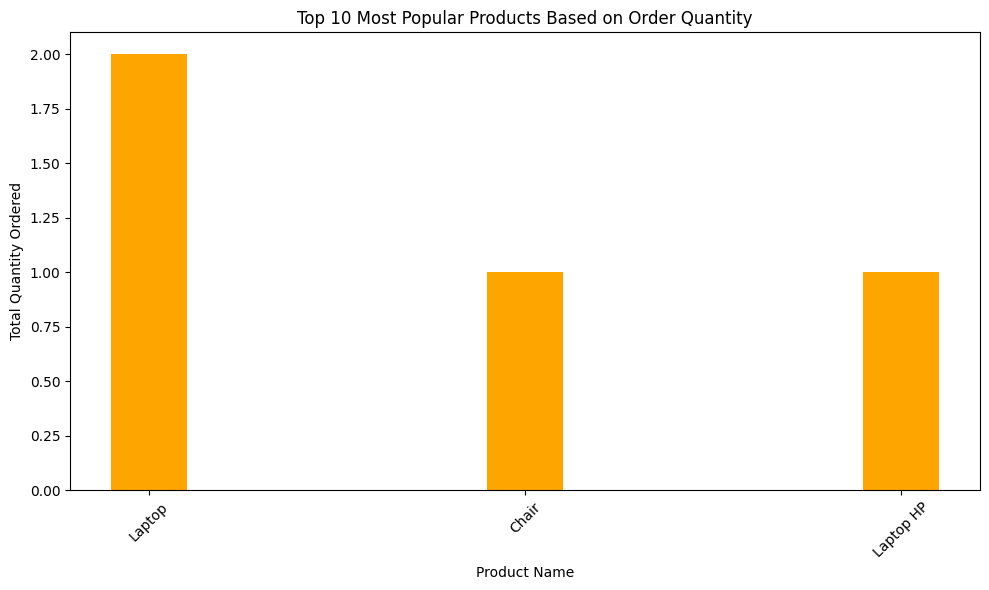

In [81]:
# Most popular products based on order quantity
most_popular_products = order_data.groupby('product_id')['quantity'].sum().sort_values(ascending=False)
most_popular_products_df = pd.merge(most_popular_products.reset_index(), product_data[['product_id', 'product_name']], on='product_id')
print("\nMost popular products based on order quantity:")
print(most_popular_products_df.head(10))

# Visualization: Most popular products based on order quantity
plt.figure(figsize=(10, 6))
plt.bar(most_popular_products_df['product_name'].head(10), most_popular_products_df['quantity'].head(10), color='orange', width=0.2)
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.title('Top 10 Most Popular Products Based on Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4. Sales Analysis

In [82]:
# Merge order_data with product_data to calculate revenue product-wise
merged_data = pd.merge(order_data, product_data, on='product_id', how='inner')

In [84]:
# Convert 'selling_price' and 'original_price' columns to float
merged_data['selling_price'] = merged_data['selling_price'].astype(float)
merged_data['original_price'] = merged_data['original_price'].astype(float)

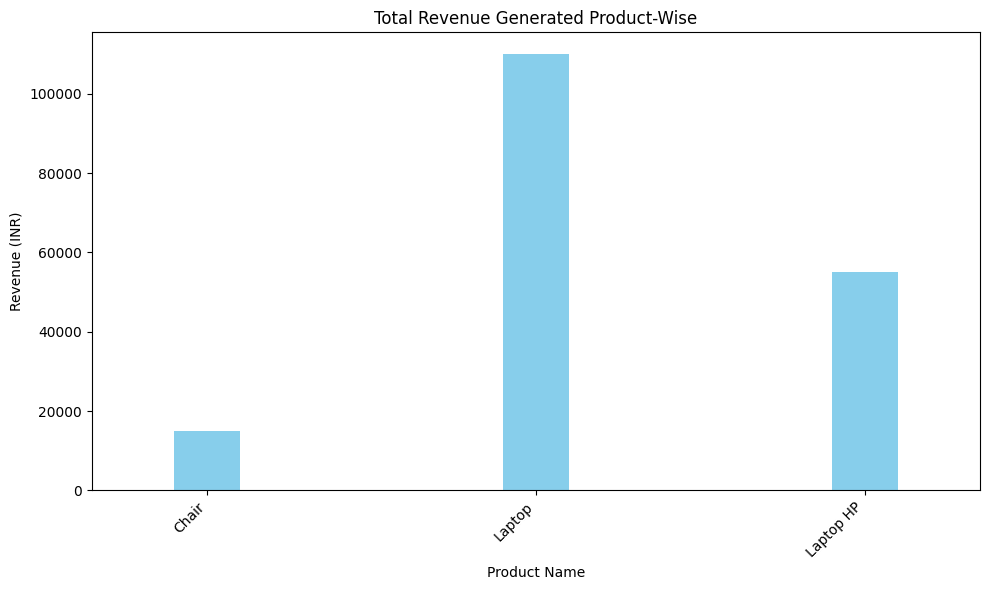

In [88]:
# 1. Calculate total revenue generated from orders product-wise
merged_data['revenue'] = merged_data['selling_price'] * merged_data['quantity']
revenue_product_wise = merged_data.groupby('product_name')['revenue'].sum()

plt.figure(figsize=(10, 6))
revenue_product_wise.plot(kind='bar', color='skyblue', width=0.2)
plt.title('Total Revenue Generated Product-Wise')
plt.xlabel('Product Name')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

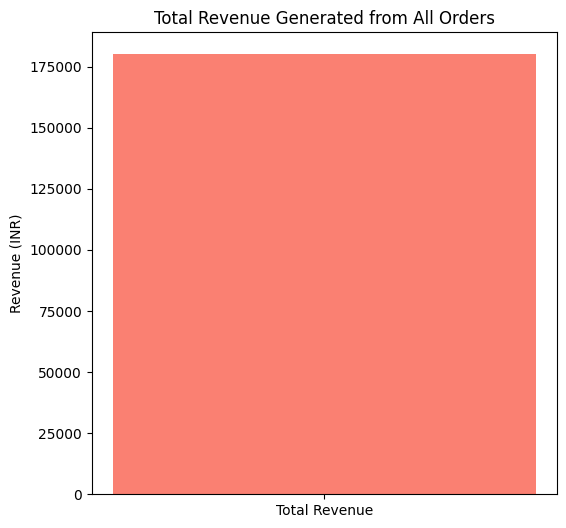

In [90]:
# 2. Calculate the total revenue generated from all orders
total_revenue = revenue_product_wise.sum()

plt.figure(figsize=(6, 6))
plt.bar(['Total Revenue'], [total_revenue], color='salmon', width=0.2)
plt.title('Total Revenue Generated from All Orders')
plt.ylabel('Revenue (INR)')
plt.show()


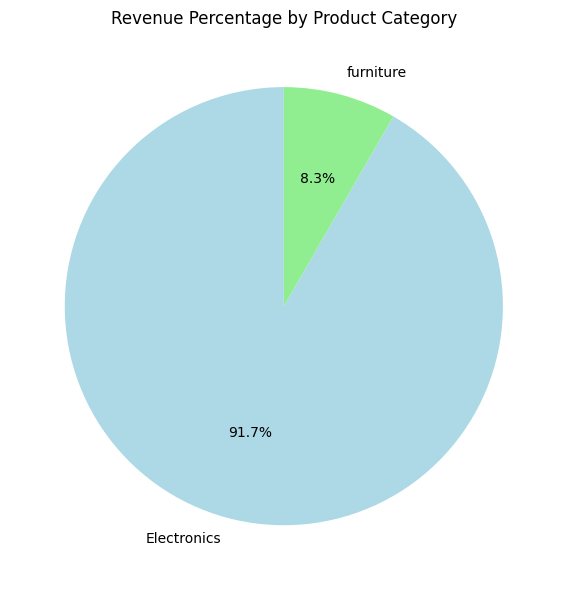

In [91]:
# 3. Calculate total revenue product category wise percentage
category_revenue = merged_data.groupby('category')['revenue'].sum()
category_revenue_percentage = (category_revenue / total_revenue) * 100

plt.figure(figsize=(8, 6))
category_revenue_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Revenue Percentage by Product Category')
plt.ylabel('')
plt.tight_layout()
plt.show()


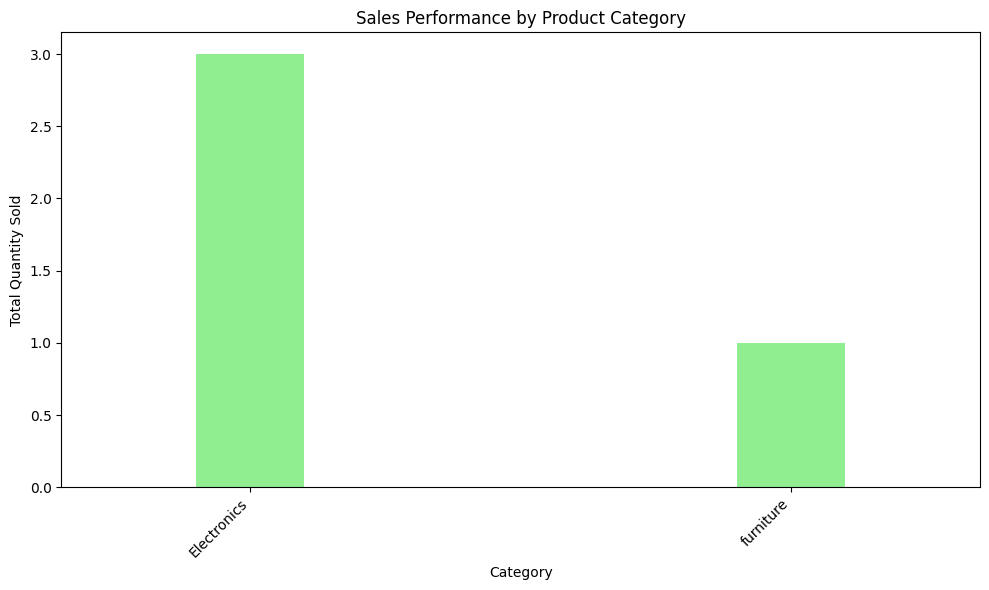

In [93]:
# 4. Analyze the performance of different product categories in terms of sales
category_sales = merged_data.groupby('category')['quantity'].sum()

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='lightgreen', width= 0.2)
plt.title('Sales Performance by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


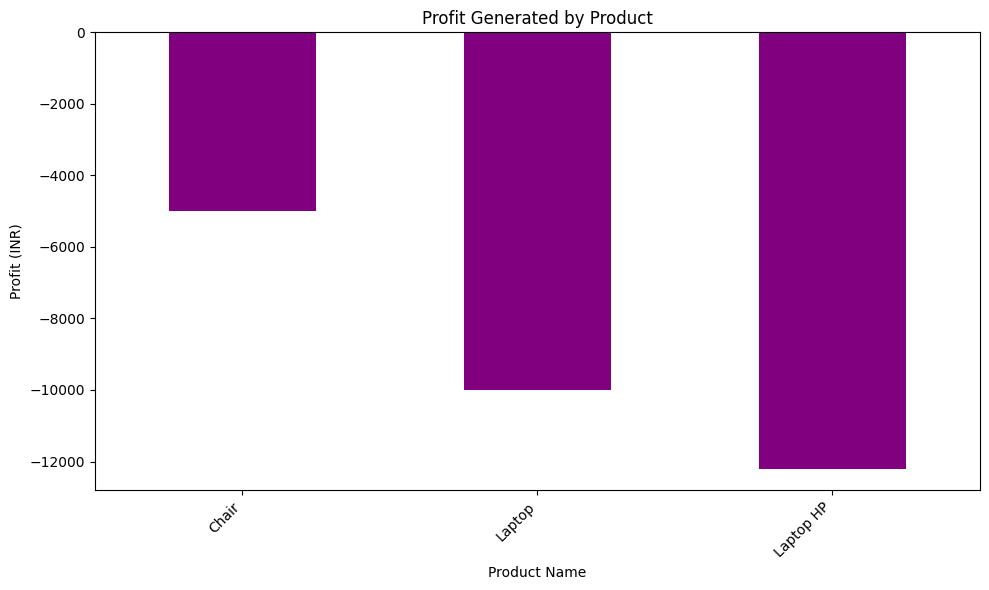

In [94]:
# 5. Identify the most profitable products based on the difference between original and selling prices
merged_data['profit'] = (merged_data['selling_price'] - merged_data['original_price']) * merged_data['quantity']
profit_product_wise = merged_data.groupby('product_name')['profit'].sum()

plt.figure(figsize=(10, 6))
profit_product_wise.plot(kind='bar', color='purple')
plt.title('Profit Generated by Product')
plt.xlabel('Product Name')
plt.ylabel('Profit (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


5. Customer Order Patterns

In [96]:
# Merge order and product data for product analysis
merged_data = pd.merge(order_data, product_data, on='product_id')

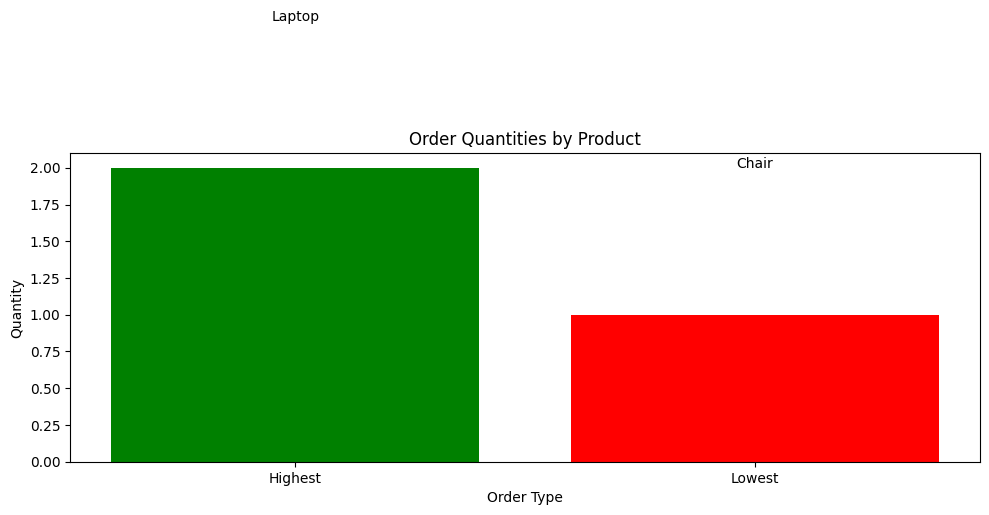

In [107]:
# 1.Identify product names with the highest and lowest order quantities
product_order_sum = merged_data.groupby('product_name')['quantity'].sum().reset_index()
highest_order_product = product_order_sum.loc[product_order_sum['quantity'].idxmax()]
lowest_order_product = product_order_sum.loc[product_order_sum['quantity'].idxmin()]

plt.figure(figsize=(10, 12))
plt.subplot(3, 1, 1)
plt.bar(['Highest', 'Lowest'], [highest_order_product['quantity'], lowest_order_product['quantity']], color=['green', 'red'])
plt.title('Order Quantities by Product')
plt.xlabel('Order Type')
plt.ylabel('Quantity')
plt.text(0, highest_order_product['quantity'] + 1, highest_order_product['product_name'], ha='center')
plt.text(1, lowest_order_product['quantity'] + 1, lowest_order_product['product_name'], ha='center')
plt.tight_layout()
plt.show()



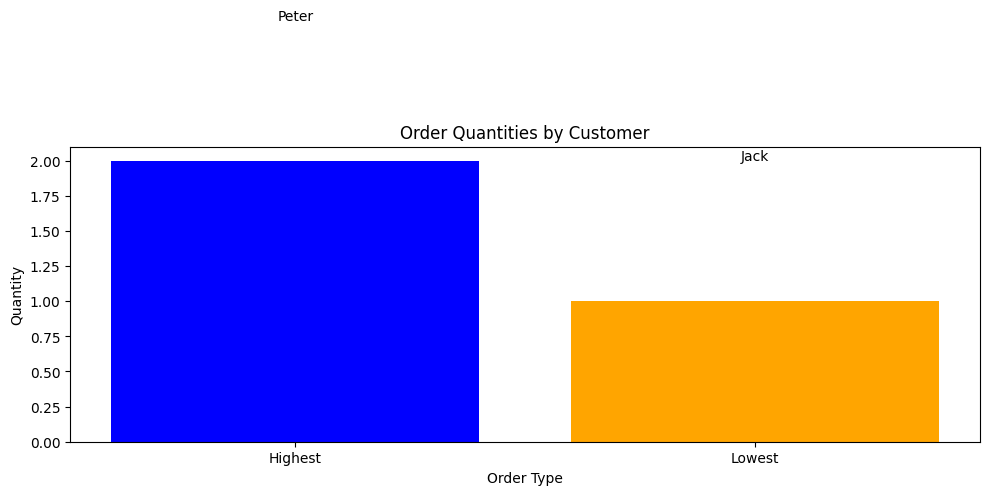

In [106]:
# 2. Identify customers with the highest and lowest order quantities by customer name
customer_order_sum = pd.merge(order_data, customer_data, on='customer_id').groupby('name')['quantity'].sum().reset_index()
highest_order_customer = customer_order_sum.loc[customer_order_sum['quantity'].idxmax()]
lowest_order_customer = customer_order_sum.loc[customer_order_sum['quantity'].idxmin()]

plt.figure(figsize=(10, 12))
plt.subplot(3, 1, 2)
plt.bar(['Highest', 'Lowest'], [highest_order_customer['quantity'], lowest_order_customer['quantity']], color=['blue', 'orange'])
plt.title('Order Quantities by Customer')
plt.xlabel('Order Type')
plt.ylabel('Quantity')
plt.text(0, highest_order_customer['quantity'] + 1, highest_order_customer['name'], ha='center')
plt.text(1, lowest_order_customer['quantity'] + 1, lowest_order_customer['name'], ha='center')
plt.tight_layout()
plt.show()


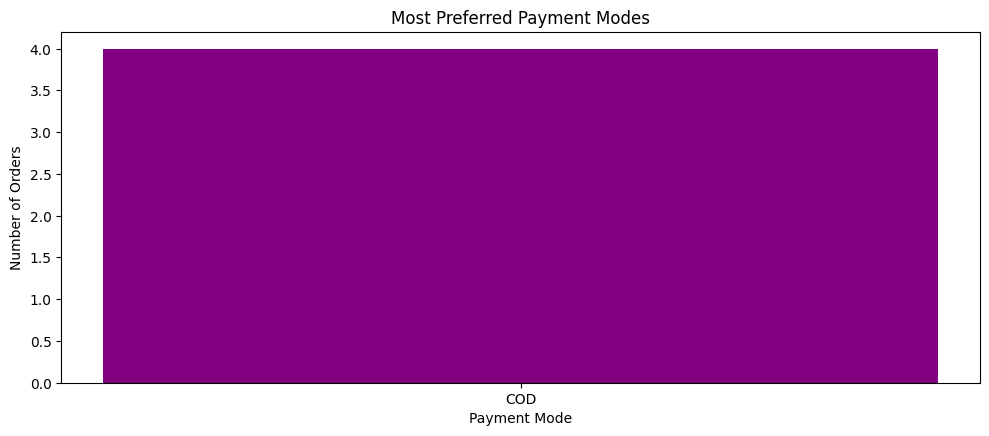

In [105]:
# 3. Determine the most preferred payment modes
payment_mode_counts = order_data['payment_mode'].value_counts()

plt.figure(figsize=(10, 12))
plt.subplot(3, 1, 3)
plt.bar(payment_mode_counts.index, payment_mode_counts.values, color='purple')
plt.title('Most Preferred Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

6. Time-based Analysis

In [108]:
# Convert order_date to datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])


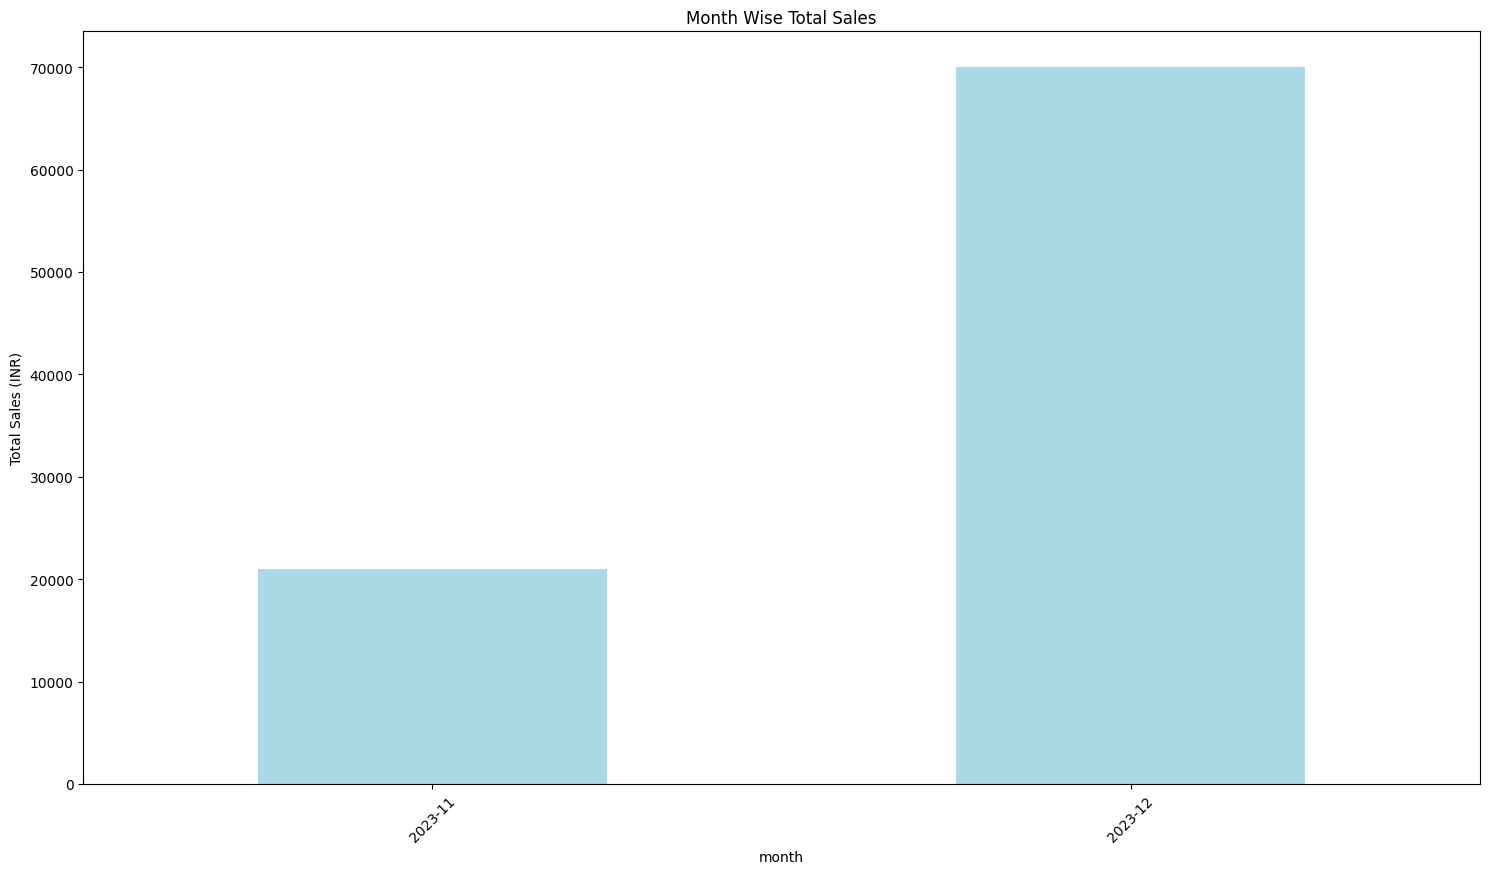

In [115]:
# 1.Calculate month-wise total sales
order_data['month'] = order_data['order_date'].dt.to_period('M')  # Extract month-year
month_wise_sales = order_data.groupby('month')['total_price'].sum()

plt.figure(figsize=(15, 25))
plt.subplot(3, 1, 1)
month_wise_sales.plot(kind='bar', color='lightblue')
plt.title('Month Wise Total Sales')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

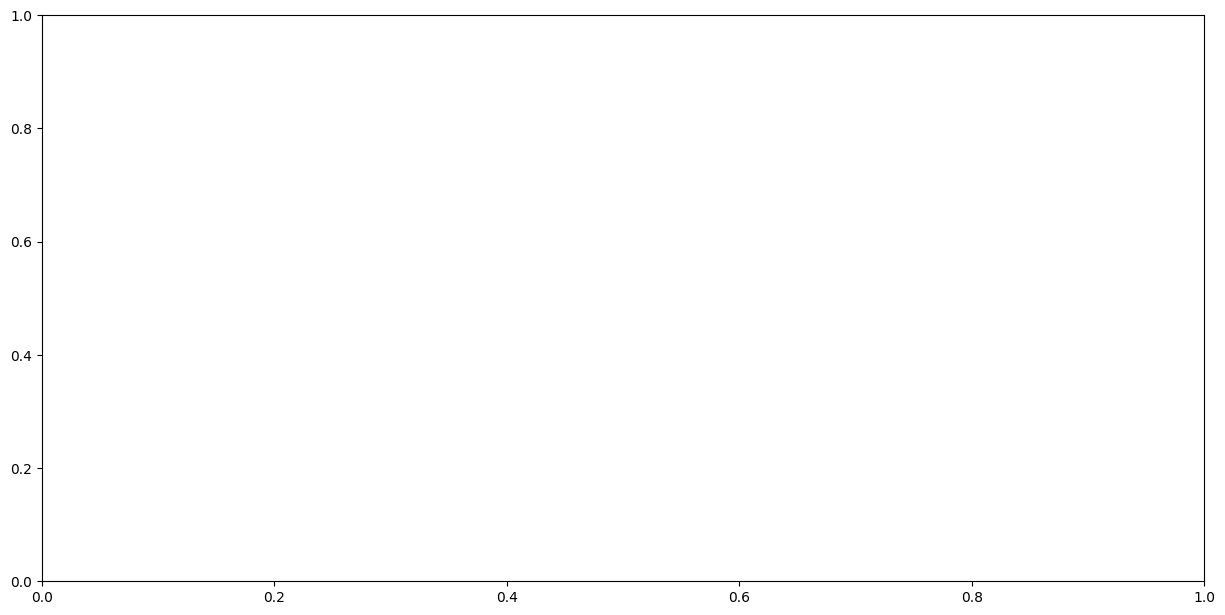

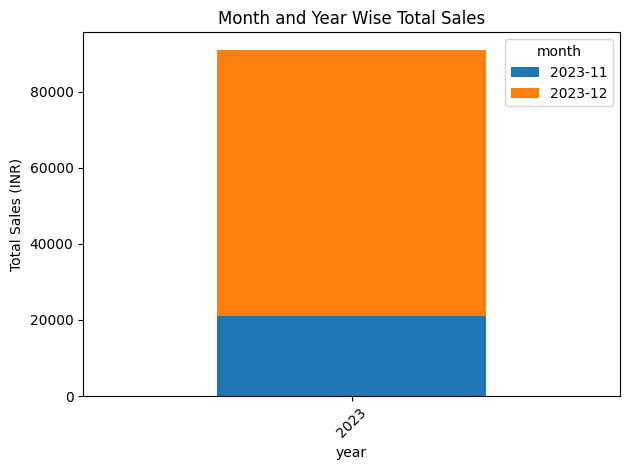

In [116]:
# 2. Calculate month and year-wise total sales
order_data['year'] = order_data['order_date'].dt.year  # Extract year
month_year_wise_sales = order_data.groupby(['year', 'month'])['total_price'].sum().unstack()

plt.figure(figsize=(15, 25))
plt.subplot(3, 1, 2)
month_year_wise_sales.plot(kind='bar', stacked=True)
plt.title('Month and Year Wise Total Sales')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

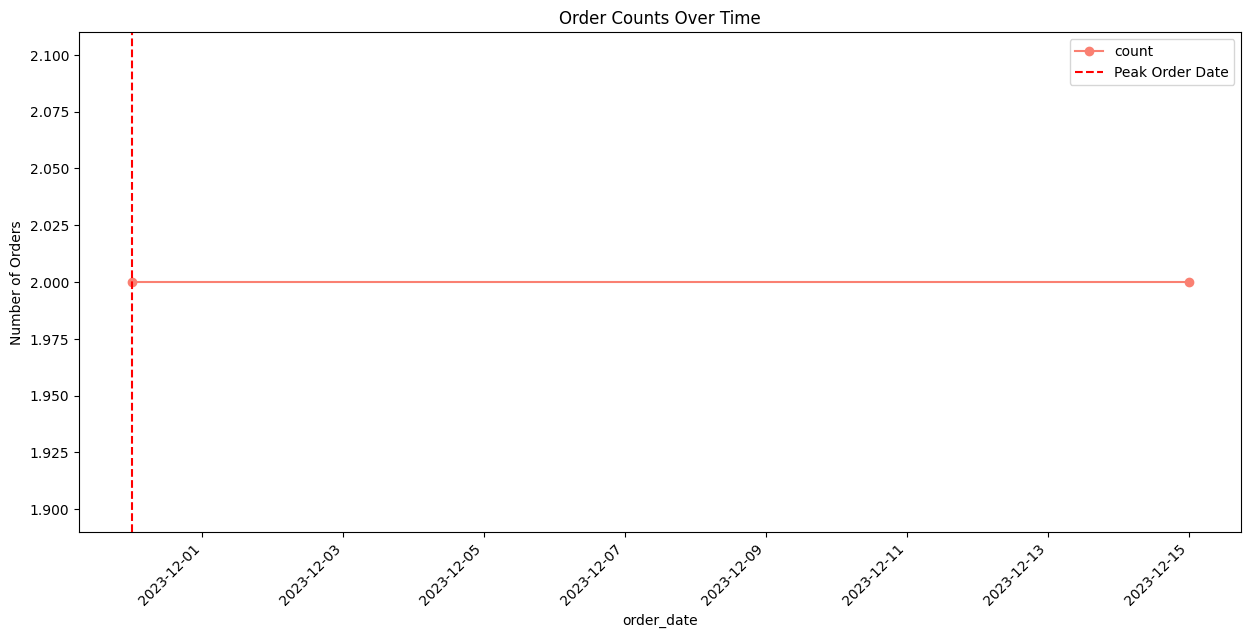

In [120]:
# 3.Identify the peak order date
peak_order_date = order_data['order_date'].value_counts().idxmax()

plt.figure(figsize=(15, 25))
plt.subplot(3, 1, 3)
order_data['order_date'].value_counts().sort_index().plot(kind='line', marker='o', color='salmon')
plt.axvline(x=peak_order_date, color='red', linestyle='--', label='Peak Order Date')
plt.title('Order Counts Over Time')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend()
plt.show()


7. Geographical Analysis

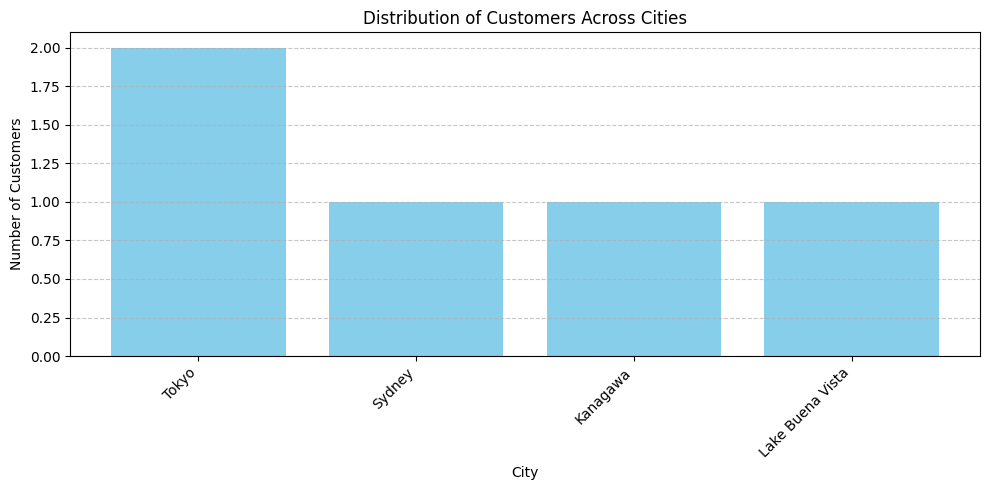

In [123]:
# 1: Distribution of customers across different cities
customer_city_distribution = customer_data['city'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(customer_city_distribution.index, customer_city_distribution.values, color='skyblue')
plt.title('Distribution of Customers Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


<Figure size 1200x600 with 0 Axes>

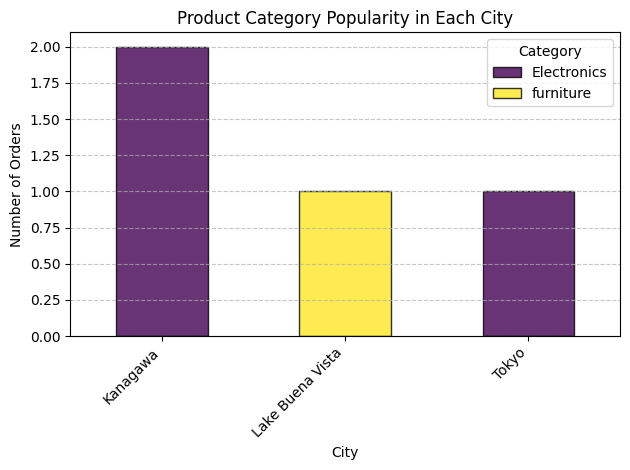

In [125]:
# 2: Popular products/categories in specific cities
# Merge customer and order data to find the popularity of products in cities
merged_data = pd.merge(order_data, customer_data, on='customer_id', how='left')
merged_data = pd.merge(merged_data, product_data, on='product_id', how='left')

# Group by city and product category to count orders
city_category_popularity = merged_data.groupby(['city', 'category'])['order_id'].count().unstack().fillna(0)

plt.figure(figsize=(12, 6))
city_category_popularity.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', alpha=0.8)
plt.title('Product Category Popularity in Each City')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

8.Product Performance

In [127]:
# Calculate the total sales for each product
product_sales = order_data.groupby('product_id')['quantity'].sum().reset_index()
product_sales = product_sales.merge(product_data[['product_id', 'product_name']], on='product_id')

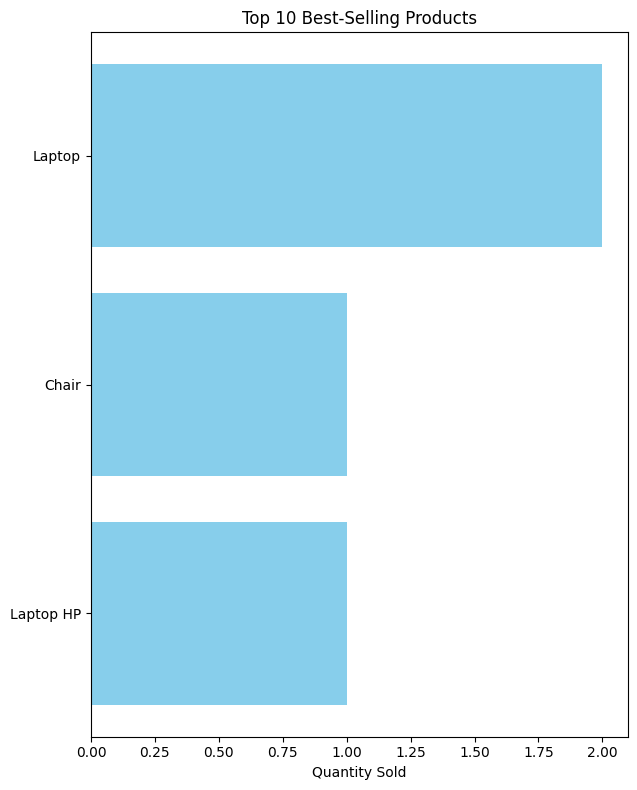

In [133]:
# 1. Top 10 best-selling products
top_10_best_selling = product_sales.sort_values(by='quantity', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.barh(top_10_best_selling['product_name'], top_10_best_selling['quantity'], color='skyblue')
plt.xlabel('Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

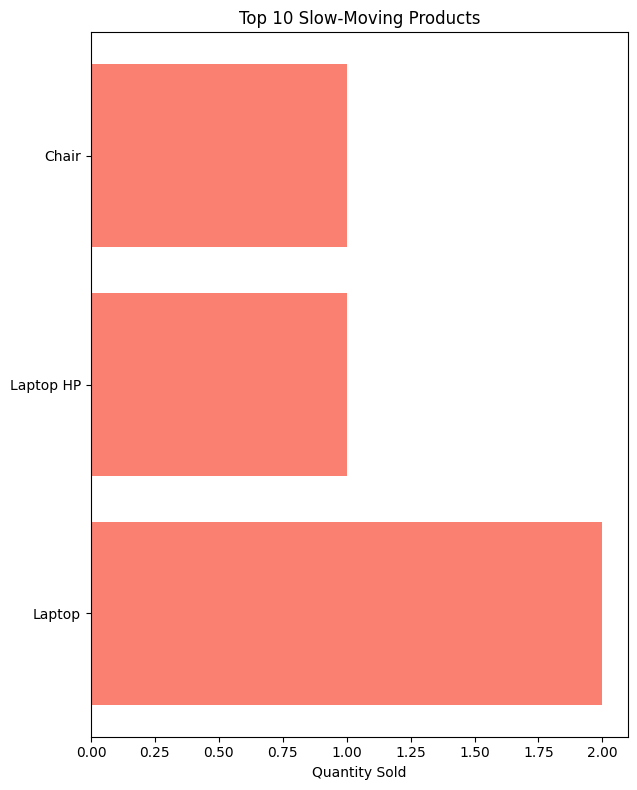

In [134]:
# 2.Top 10 slow-moving products
top_10_slow_moving = product_sales.sort_values(by='quantity', ascending=True).head(10)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
plt.barh(top_10_slow_moving['product_name'], top_10_slow_moving['quantity'], color='salmon')
plt.xlabel('Quantity Sold')
plt.title('Top 10 Slow-Moving Products')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

9. Customer Retention

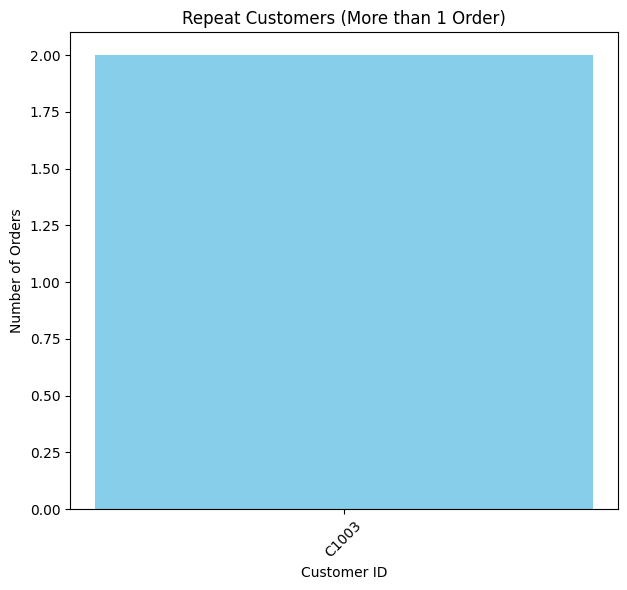

In [135]:
# 1. Analyze repeat customers and their order patterns
repeat_customers = order_data['customer_id'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(repeat_customers.index, repeat_customers.values, color='skyblue')
plt.title('Repeat Customers (More than 1 Order)')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [138]:
# 2. Calculate customer retention rates over time
# Convert order_date to datetime
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

In [139]:
# Extract year and month for monthly retention analysis
order_data['order_month'] = order_data['order_date'].dt.to_period('M')

In [140]:
# Count unique customers per month
monthly_customers = order_data.groupby('order_month')['customer_id'].nunique()

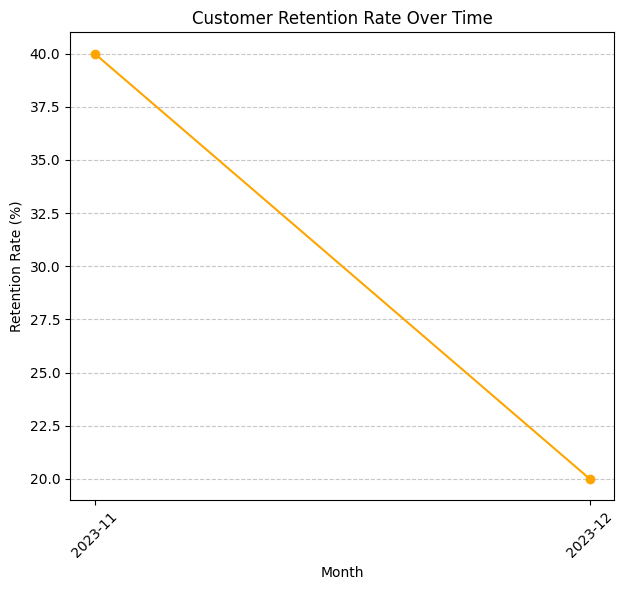

In [142]:
# Calculate retention rate (percentage of repeat customers each month)
retention_rate = (monthly_customers / len(customer_data)) * 100

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(retention_rate.index.astype(str), retention_rate.values, marker='o', linestyle='-', color='orange')
plt.title('Customer Retention Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

10. Payment Analysis


Payment Counts:
order_status
Pending      2
Delivered    2
Name: count, dtype: int64


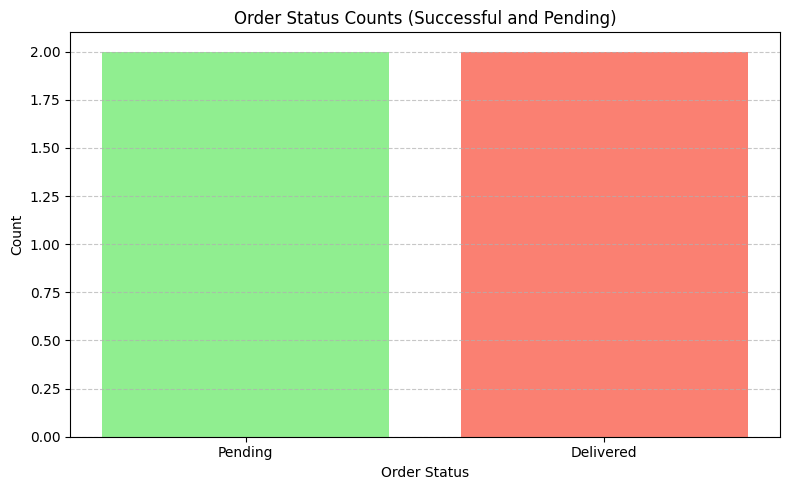

In [143]:
# 1. Calculate the counts for successful (Delivered) and pending payments
payment_counts = order_data['order_status'].value_counts()

# Print payment counts
print("\nPayment Counts:")
print(payment_counts)

# Visualization using Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(payment_counts.index, payment_counts.values, color=['lightgreen', 'salmon'])
plt.title('Order Status Counts (Successful and Pending)')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()